<a href="https://colab.research.google.com/github/georodriguesn/projetos-datascience/blob/master/An%C3%A1lise_de_Dados_Airbnb_New_York_City.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos dados do Airbnb - New York City

O [Airbnb](https://www.airbnb.com.br) já é considerado a maior empresa hoteleira da atualidade . Ah, o detalhe é que ele não possui nenhum hotel!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb criou uma plataforma inovadora para tornar essa hospedagem alternativa.

Uma das iniciativas do Airbnb é disponibilizar, através do seu site, informações das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de Data Science.

**Neste caderno, analisaremos os dados relacionados a cidade de Nova Iorque e veremos quais informações poderão ser extraídas a partir dos dados brutos.**

#Obtenção dos dados



Todos os dados utilizados nesta análise foram obtidos através do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html). Para a análise exploratória inicial foi utilizado o arquivo:

* *listings.csv* - `Summary information and metrics for listings in New York City (good for visualisations).`





In [0]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [0]:
# importar o arquivo listings.csv relativo às informações de Nova Iorque para um DataFrame
df = pd.read_csv ("http://data.insideairbnb.com/united-states/ny/new-york-city/2019-12-04/visualisations/listings.csv")


# Análise dos dados

Esta fase nos permite criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.



In [0]:
# identificar as variáveis existentes no DataFrame
df.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Dicionário das variáveis**

*   `id` - número de id gerado para identificar o imóvel
*   `name` - nome da propriedade anunciada
*   `host_id` - número de id do proprietário (anfitrião) da propriedade
*   `host_name` - Nome do anfitrião
*   `neighbourhood_group` - esta coluna não contém nenhum valor válido
*   `neighbourhood` - nome do bairro
*   `latitude` - coordenada da latitude da propriedade
*   `longitude` - coordenada da longitude da propriedade
*   `room_type` - informa o tipo de quarto que é oferecido
*   `price` - preço para alugar o imóvel
*   `minimum_nights` - quantidade mínima de noites para reservar
*   `number_of_reviews` - número de reviews que a propriedade possui
*   `last_review` - data do último review
*   `reviews_per_month` - quantidade de reviews por mês
*   `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
*   `availability_365` - número de dias de disponibilidade dentro de 365 dias




Antes de iniciar qualquer análise, verificaremos a estrutura do nosso *dataset*, analisando as cinco primeiras entradas.


In [0]:
# mostrar as 5 primeiras entradas
df.head ()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,10,48,2019-11-04,0.39,1,1
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,295,2019-11-22,4.67,1,1
2,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.60,1,19
3,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,49,2017-10-05,0.38,1,365
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,454,2019-11-21,3.52,1,242


In [0]:
#mostrar os bairros ('neighbourhoods") contidos no DataFrame
df['neighbourhood'].unique()

array(['Midtown', 'Clinton Hill', 'Murray Hill', 'Bedford-Stuyvesant',
       "Hell's Kitchen", 'Upper West Side', 'Chinatown', 'South Slope',
       'West Village', 'Williamsburg', 'Fort Greene', 'Chelsea',
       'Crown Heights', 'East Harlem', 'Park Slope', 'Windsor Terrace',
       'Inwood', 'East Village', 'Harlem', 'Greenpoint', 'Bushwick',
       'Flatbush', 'Lower East Side', 'Prospect-Lefferts Gardens',
       'Long Island City', 'Kips Bay', 'SoHo', 'Upper East Side',
       'Red Hook', 'Prospect Heights', 'Washington Heights', 'Woodside',
       'Brooklyn Heights', 'Carroll Gardens', 'Gowanus', 'Flatlands',
       'Cobble Hill', 'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO',
       'St. George', 'Tribeca', 'Highbridge', 'NoHo', 'Ridgewood',
       'Port Morris', 'Morningside Heights', 'Jamaica', 'Middle Village',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'Tompkinsville', 'Astoria',
       'Kensington', 'C

## Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?

Iremos identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

In [0]:
# identificar o volume de dados do DataFrame
print ("Variáveis:\t {}".format (df.shape [0]))
print ("Entradas:\t {}".format (df.shape [1]))

# identificar os tipos de variáveis
display (df.dtypes)

Variáveis:	 50599
Entradas:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Qual o percentual de valores ausentes no dataset?

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas. Observamos que temos poucos dados faltantes:

*   a coluna `reviews_per_month` e `last_review` possui 20% dos seus valores faltantes; e
*   as colunas `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.





In [0]:
# ordem descrescente das variáveis e seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.201980
last_review                       0.201980
host_name                         0.011127
name                              0.000336
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

## Qual o tipo de distribuição das variáveis?

Plotarei um histograma a fim de identificar a distribuição das variáveis e possíveis *outliers* presentes nos dados.

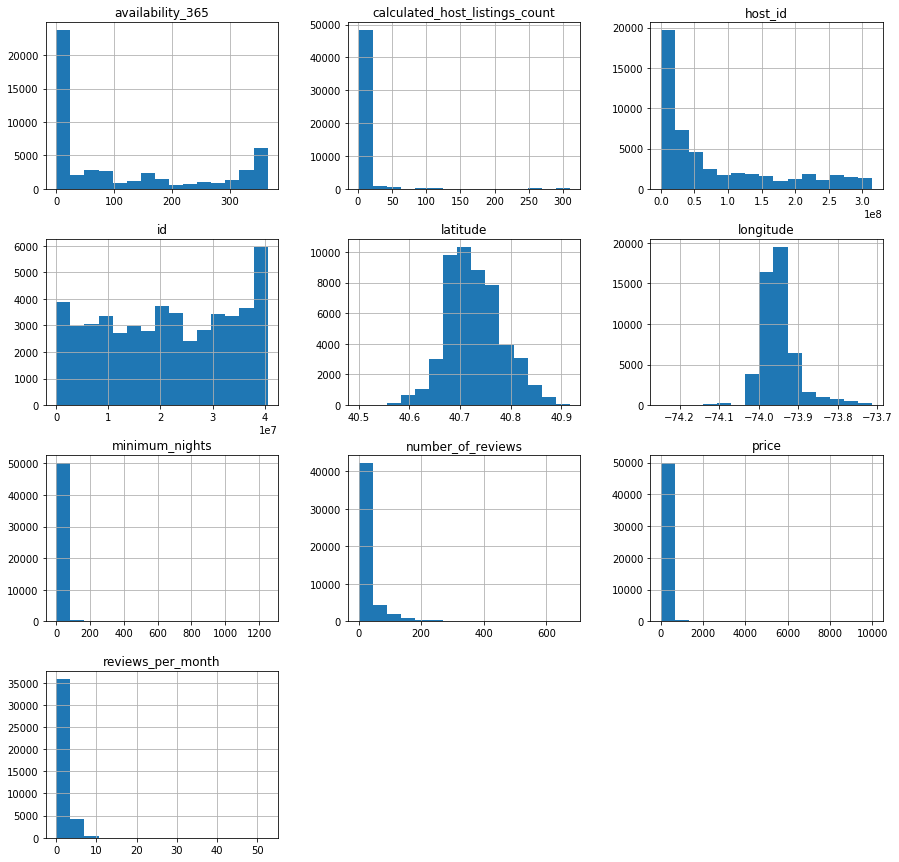

In [0]:
 #plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,15));

## Há *outliers* presentes?

Pela distribuição do histograma, é possível identificar *outliers* presentes nas variáveis `price`, `minimum_nights` e `calculated_host_listings_count`, pois os valores não seguem uma distribuição lógica e distorcem toda a representação gráfica. 

Para confirmar a presença de *outliers*, há duas maneiras bem rápidas:

*   Resumo estatístico por meio do método *`describe()`* e
*   Plotar `boxplots` para as variáveis.



In [0]:
# ver o resumo estatístico das variáveis numéricas através do describe()
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,50599.000000,50599.000000,50599.000000,40379.000000,50599.000000,50599.000000
mean,158.171782,7.531908,24.809225,1.405862,7.330916,112.785944
std,348.089562,22.454271,47.317882,1.695551,32.757485,135.891028
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,105.000000,3.000000,6.000000,0.740000,1.000000,42.000000
75%,175.000000,5.000000,25.000000,2.110000,2.000000,225.000000
max,10000.000000,1250.000000,675.000000,52.630000,310.000000,365.000000


Olhando o resumo estatístico acima podemos confirmar algumas hipóteses:

*   75% dos valores contidos na variável `price` possuem valores abaixo de 175 dólares porém o valor máximo é de 10.000 dólares;
*   O valor máximo da variável `minimum_nights` é 1.250 noites, o que ultrapassa a quantidade de 365 dias (um ano).



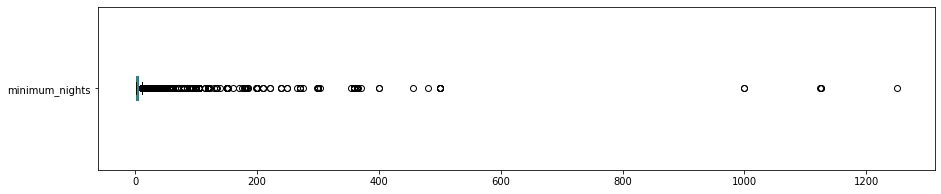

minimum_nights - valores acima de 30 dias:
938 entradas
1.8538%


In [0]:
# bloxplot para minimum_nights
df.minimum_nights.plot(kind="box", vert=False, figsize=(15, 3))
plt.show()

# ver a quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights - valores acima de 30 dias:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

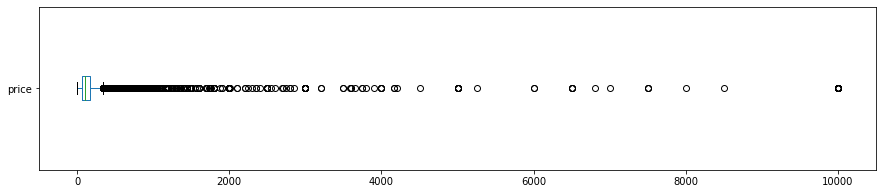


price: valores acima de 300 dólares:
3377 entradas
6.6740%


In [0]:
# bloxplot para price
df.price.plot(kind="box", vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de $300 para price
print("\nprice: valores acima de 300 dólares:")
print("{} entradas". format(len(df[df.price > 300])))
print("{:.4f}%".format((len(df[df.price > 300]) / df.shape[0])*100))

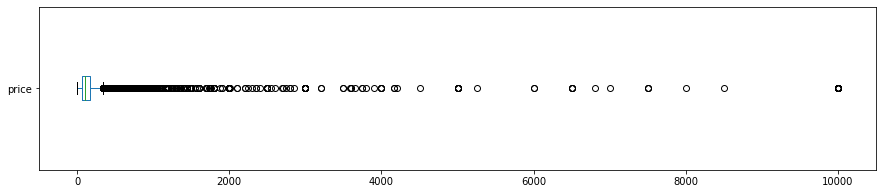


calculated_host_listings_count: valores acima de 4 imóveis:
6416 entradas
12.6801%


In [0]:
# bloxplot para calculated_host_listings_count
df.price.plot(kind="box", vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de imóveis por anfitrião acima de 4
print("\ncalculated_host_listings_count: valores acima de 4 imóveis:")
print("{} entradas". format(len(df[df.calculated_host_listings_count > 4])))
print("{:.4f}%".format((len(df[df.calculated_host_listings_count > 4]) / df.shape[0])*100))

### Histogramas sem *outliers*

Identificado os outliers no *DataFrame*, trabalharemos com uma cópia dos dados excluindo as informações de `minimum_nigts` acima de 30 dias, de `price` acima de 300 dólares e de `calculated_host_listings_count` acima de 4 imóveis por anfitrião e plotaremos um novo histograma.


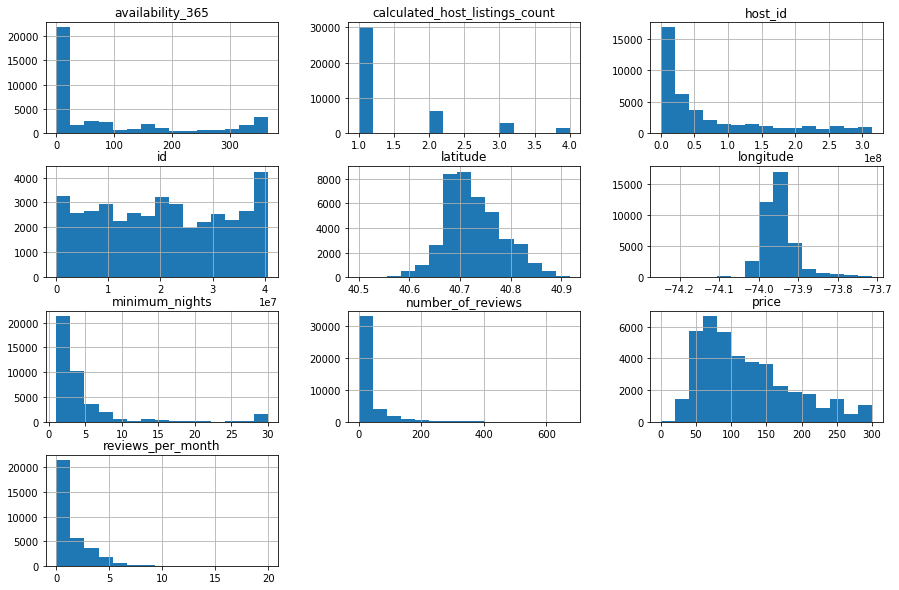

In [0]:
# remover os outliers criando um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price > 300].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 4].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15, 10));


## Qual o tipo de imóvel mais alugado em Nova Iorque pelo Airbnb?

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo aluguel de quartos compartilhados com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel usando o método `value_counts()`.


In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    20301
Private room       19680
Shared room          718
Hotel room            48
Name: room_type, dtype: int64

In [0]:
# mostrar o percentual de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.498221
Private room       0.482980
Shared room        0.017621
Hotel room         0.001178
Name: room_type, dtype: float64

Percebe-se que 97% dos imóveis disponíveis para aluguel em Nova Iorque são das categorias 'Casa/apartamento privado' e 'Quarto privado'.

** **Ver observação no item 'Conclusão', no final da análise**.

## Qual a localidade mais cara e a mais barata de Nova Iorque?

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (`neighbourhoods`) a partir do preço de locação.

Veremos os bairros com valores de hospedagem mais altos e mais baixos considerando o novo *DataFrame*, após exclusão dos *outliers*.

In [0]:
# comparação neighbourhoods X price - Localidades mais caras
print("Localidades mais caras de New York:")
df_clean.groupby(["neighbourhood"]).price.mean().sort_values(ascending=False)[:20]

Localidades mais caras de New York:


neighbourhood
Neponsit              237.000000
Breezy Point          213.333333
NoHo                  203.000000
West Village          188.317789
Tribeca               184.569620
Flatiron District     182.942308
Greenwich Village     179.535117
Midtown               174.311170
Chelsea               172.363286
Nolita                171.467033
Battery Park City     166.636364
DUMBO                 166.485714
Murray Hill           165.466667
Financial District    165.300319
Hell's Kitchen        164.995441
SoHo                  164.414747
Theater District      160.620000
Gramercy              159.309434
Boerum Hill           158.908497
Lighthouse Hill       157.500000
Name: price, dtype: float64

In [0]:
# comparação neighbourhoods X price - Localidades mais baratas
print("Localidades mais baratas de New York:")
df_clean.groupby(["neighbourhood"]).price.mean().sort_values(ascending=True)[:20]

Localidades mais baratas de New York:


neighbourhood
Little Neck           37.333333
Bull's Head           37.666667
Eastchester           40.000000
Country Club          50.000000
Soundview             50.588235
Co-op City            51.666667
Westchester Square    53.333333
Port Richmond         55.888889
Schuylerville         56.000000
South Beach           57.000000
New Dorp              57.000000
Woodlawn              60.636364
Bronxdale             60.944444
New Dorp Beach        62.400000
Mount Eden            62.500000
Tremont               64.277778
New Brighton          65.000000
Allerton              65.250000
Melrose               66.166667
Hunts Point           66.222222
Name: price, dtype: float64

Observamos que os quatro bairros mais caros em Nova Iorque, mais especificamente na região de Manhattan aparecem na lista de localidades mais caras: SoHo, Tribeca, Flatiron District e Midtown Manhattan. Entre as localidades mais baratas temos bairros como Little Neck, Bull's Head e Eastchester, que ficam mais afastados da região de Manhattan, o que para turistas talvez não seria interessante.


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

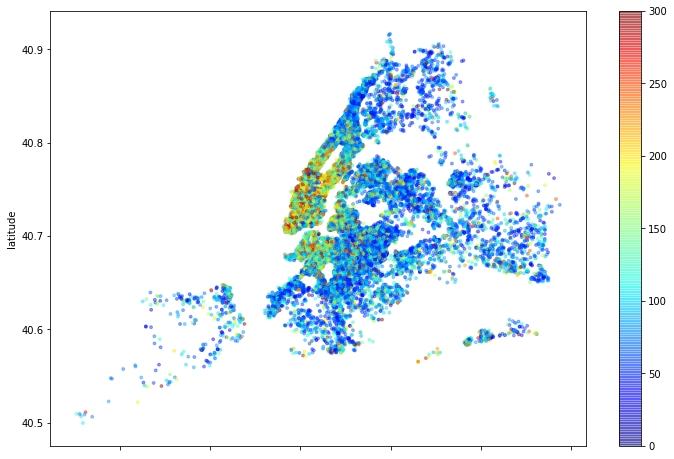

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

Quando plotamos as informações utilizando a `latitude` e `longitude` podemos ver que os maiores valores de hospedagem estão na região de Manhattan (cores vermelhas e amarelas). E que a presença dominante da cor azul ainda é um indicativo de presença de *outliers* e valores discrepantes.

# Conclusão

Foi realizada apenas uma análise superficial na base de dados do Airbnb relativos a cidade de Nova Iorque. Essa análise simples já foi suficiente para perceber a presença de outliers que acabam distorcendo o resultado final da análise.

Foi excluído alguns outliers referente as informações de `minimum_nigts`, `price` e `calculated_host_listings_count`, o que melhorou muito o *DataFrame* e se permitiu chegar a informações úteis como os tipos de imóveis com maior disponibilidade para aluguel e a média de preços entre os bairros de Nova Iorque, considerando o valor médio da diária até $300.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. 

**Observação**: Há uma Lei Estadual em Nova Iorque que regulamenta o funcionamento dos sites de compartilhamento de acomodações, o que inclui o Airbnb, com várias regras de utilização, entre elas, a que proibe os short-term (hospedagens por menos de 30 dias em acomodações inteiras) sem a presença do responsável pelo apartamento.

